# Heart Dataset

    Analyzing of heart dataset and getting the target  possibility using the different models

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('heart.csv') #importing the data
data

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [4]:
#assigning the right column names for better understanding of data

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [5]:
#since there nan values and converting them into 0

data.replace(np.nan,0)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [6]:
#converting the ? into 0 

data=data.replace('?',0)
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,44,1,4,130,209,0,1,127,0,0,0,0,0,0
1,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
2,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,0,0,0,1
195,62,1,1,0,139,0,1,0,0,0,0,0,0,0
196,55,1,4,122,223,1,1,100,0,0,0,0,6,2
197,58,1,4,0,385,1,2,0,0,0,0,0,0,0


In [7]:
#Getting info of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      199 non-null    int64 
 1   sex                      199 non-null    int64 
 2   chest_pain_type          199 non-null    int64 
 3   resting_blood_pressure   199 non-null    object
 4   cholesterol              199 non-null    object
 5   fasting_blood_sugar      199 non-null    object
 6   rest_ecg                 199 non-null    int64 
 7   max_heart_rate_achieved  199 non-null    object
 8   exercise_induced_angina  199 non-null    object
 9   st_depression            199 non-null    object
 10  st_slope                 199 non-null    object
 11  num_major_vessels        199 non-null    object
 12  thalassemia              199 non-null    object
 13  target                   199 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 21.9+

In [8]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [9]:
#converting data into int data type

data['resting_blood_pressure']=data['resting_blood_pressure'].astype(int)
data['cholesterol']=data['cholesterol'].astype(int)
data['fasting_blood_sugar']=data['fasting_blood_sugar'].astype(int)
data['max_heart_rate_achieved']=data['max_heart_rate_achieved'].astype(int)
data['exercise_induced_angina']=data['exercise_induced_angina'].astype(int)
data['st_slope']=data['st_slope'].astype(int)
data['num_major_vessels']=data['num_major_vessels'].astype(int)
data['thalassemia']=data['thalassemia'].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      199 non-null    int64 
 1   sex                      199 non-null    int64 
 2   chest_pain_type          199 non-null    int64 
 3   resting_blood_pressure   199 non-null    int32 
 4   cholesterol              199 non-null    int32 
 5   fasting_blood_sugar      199 non-null    int32 
 6   rest_ecg                 199 non-null    int64 
 7   max_heart_rate_achieved  199 non-null    int32 
 8   exercise_induced_angina  199 non-null    int32 
 9   st_depression            199 non-null    object
 10  st_slope                 199 non-null    int32 
 11  num_major_vessels        199 non-null    int32 
 12  thalassemia              199 non-null    int32 
 13  target                   199 non-null    int64 
dtypes: int32(8), int64(5), object(1)
memory us

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = stage 1,2 = stage 2, 3 = stage 3, 4 = stage4)

In [11]:
#co-relation between data

data.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_slope,num_major_vessels,thalassemia,target
age,1.000000,0.033837,-0.039809,0.038266,0.048249,0.137672,0.001487,-0.057550,0.104202,0.090867,NaN,-0.047205,0.286630
sex,0.033837,1.000000,0.037525,-0.039495,-0.102511,-0.058846,0.060305,-0.037895,-0.009761,0.031332,NaN,-0.091401,0.147190
chest_pain_type,-0.039809,0.037525,1.000000,0.225128,0.046738,-0.042263,0.033617,0.171168,0.275582,0.211673,NaN,0.141875,0.167202
resting_blood_pressure,0.038266,-0.039495,0.225128,1.000000,0.000650,-0.008287,-0.003418,0.875806,0.576073,0.485740,NaN,0.212401,0.084736
cholesterol,0.048249,-0.102511,0.046738,0.000650,1.000000,0.159454,0.000925,-0.090713,0.030673,-0.063143,NaN,-0.066655,0.057064
fasting_blood_sugar,0.137672,-0.058846,-0.042263,-0.008287,0.159454,1.000000,0.172306,-0.053622,-0.214788,-0.097693,NaN,0.126069,0.050448
rest_ecg,0.001487,0.060305,0.033617,-0.003418,0.000925,0.172306,1.000000,-0.028826,-0.087881,-0.144497,NaN,0.069698,-0.033597
max_heart_rate_achieved,-0.057550,-0.037895,0.171168,0.875806,-0.090713,-0.053622,-0.028826,1.000000,0.519081,0.522436,NaN,0.203751,0.057517
exercise_induced_angina,0.104202,-0.009761,0.275582,0.576073,0.030673,-0.214788,-0.087881,0.519081,1.000000,0.538000,NaN,0.148970,0.258847
st_slope,0.090867,0.031332,0.211673,0.485740,-0.063143,-0.097693,-0.144497,0.522436,0.538000,1.000000,NaN,0.023831,0.219061


In [115]:
#getting the descrptive data

data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_slope,num_major_vessels,thalassemia,target
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,199.000000
mean,59.331658,0.969849,3.502513,96.090452,172.050251,0.341709,0.733668,90.145729,0.472362,1.040201,0.0,1.075377,1.517588
std,7.827080,0.171433,0.796928,62.999614,116.880788,0.475479,0.684918,57.626575,0.500495,1.167053,0.0,2.432803,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,60.000000,1.000000,4.000000,122.000000,214.000000,0.000000,1.000000,111.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,0.0,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,3.000000,0.0,7.000000,4.000000


In [45]:
data.sample(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
13,57,1,4,128,0,1,1,148,1,1,2,0,0,1
161,57,1,4,156,173,0,2,119,1,3,3,0,0,3
109,65,1,4,0,312,0,2,0,0,0,0,0,0,3
181,55,1,4,120,226,0,2,127,1,1.7,3,0,7,1
182,56,1,4,130,203,1,0,98,0,1.5,2,0,7,1


In [50]:
data.nunique()

age                        39
sex                         2
chest_pain_type             4
resting_blood_pressure     40
cholesterol                99
fasting_blood_sugar         2
rest_ecg                    3
max_heart_rate_achieved    60
exercise_induced_angina     2
st_depression              15
st_slope                    4
num_major_vessels           1
thalassemia                 4
target                      5
dtype: int64

1    56
0    51
3    42
2    40
4    10
Name: target, dtype: int64


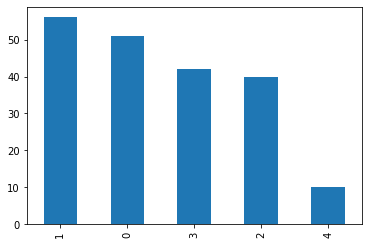

In [24]:
print(data['target'].value_counts())
data['target'].value_counts().plot.bar()

In [53]:
target_temp=data['target'].value_counts()
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/200,5)))
print("Percentage of patience with heart problems at 1st stage: "+str(round(target_temp[1]*100/200,5)))
print("Percentage of patience with heart problems at 2nd stage: "+str(round(target_temp[2]*100/200,5)))
print("Percentage of patience with heart problems at 3rd stage: "+str(round(target_temp[3]*100/200,5)))
print("Percentage of patience with heart problems at 4th stage: "+str(round(target_temp[3]*100/200,5)))

Percentage of patience without heart problems: 25.5
Percentage of patience with heart problems at 1st stage: 28.0
Percentage of patience with heart problems at 2nd stage: 20.0
Percentage of patience with heart problems at 3rd stage: 21.0
Percentage of patience with heart problems at 4th stage: 21.0


Details whether they ahve heart dieases are not as shown above

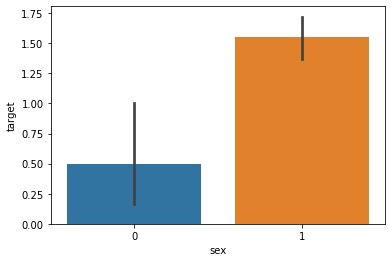

In [60]:
sb.barplot(x='sex',y='target',data=data)

62    15
63    14
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64


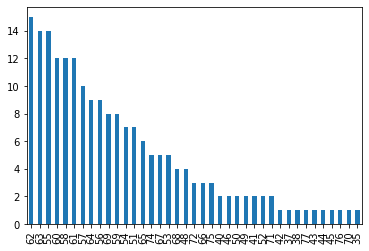

In [78]:
print(data['age'].value_counts())
data['age'].value_counts().plot.bar()

4    130
3     47
2     14
1      8
Name: chest_pain_type, dtype: int64


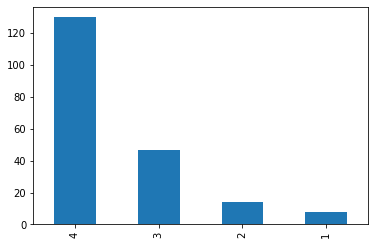

In [79]:
print(data['chest_pain_type'].value_counts())
data['chest_pain_type'].value_counts().plot.bar()

0      57
120    16
130    15
110     9
150     9
140     9
160     8
122     6
142     5
136     4
170     4
124     4
126     4
128     4
134     4
144     4
132     3
158     3
138     2
112     2
180     2
152     2
154     2
155     2
125     2
104     2
116     2
96      1
100     1
102     1
106     1
178     1
172     1
114     1
118     1
135     1
156     1
127     1
146     1
190     1
Name: resting_blood_pressure, dtype: int64


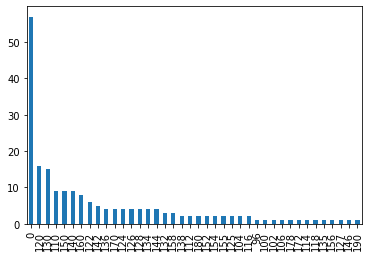

In [86]:
print(data['resting_blood_pressure'].value_counts())
data['resting_blood_pressure'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189D5975088>,
      dtype=object)

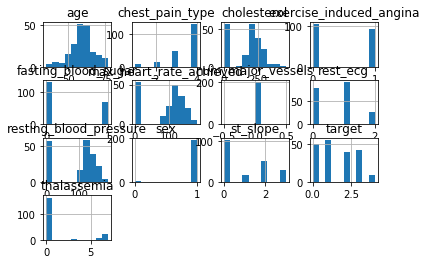

In [83]:
data.hist()

In [87]:
data.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_slope,num_major_vessels,thalassemia,target
age,1.000000,0.033837,-0.039809,0.038266,0.048249,0.137672,0.001487,-0.057550,0.104202,0.090867,NaN,-0.047205,0.286630
sex,0.033837,1.000000,0.037525,-0.039495,-0.102511,-0.058846,0.060305,-0.037895,-0.009761,0.031332,NaN,-0.091401,0.147190
chest_pain_type,-0.039809,0.037525,1.000000,0.225128,0.046738,-0.042263,0.033617,0.171168,0.275582,0.211673,NaN,0.141875,0.167202
resting_blood_pressure,0.038266,-0.039495,0.225128,1.000000,0.000650,-0.008287,-0.003418,0.875806,0.576073,0.485740,NaN,0.212401,0.084736
cholesterol,0.048249,-0.102511,0.046738,0.000650,1.000000,0.159454,0.000925,-0.090713,0.030673,-0.063143,NaN,-0.066655,0.057064
fasting_blood_sugar,0.137672,-0.058846,-0.042263,-0.008287,0.159454,1.000000,0.172306,-0.053622,-0.214788,-0.097693,NaN,0.126069,0.050448
rest_ecg,0.001487,0.060305,0.033617,-0.003418,0.000925,0.172306,1.000000,-0.028826,-0.087881,-0.144497,NaN,0.069698,-0.033597
max_heart_rate_achieved,-0.057550,-0.037895,0.171168,0.875806,-0.090713,-0.053622,-0.028826,1.000000,0.519081,0.522436,NaN,0.203751,0.057517
exercise_induced_angina,0.104202,-0.009761,0.275582,0.576073,0.030673,-0.214788,-0.087881,0.519081,1.000000,0.538000,NaN,0.148970,0.258847
st_slope,0.090867,0.031332,0.211673,0.485740,-0.063143,-0.097693,-0.144497,0.522436,0.538000,1.000000,NaN,0.023831,0.219061


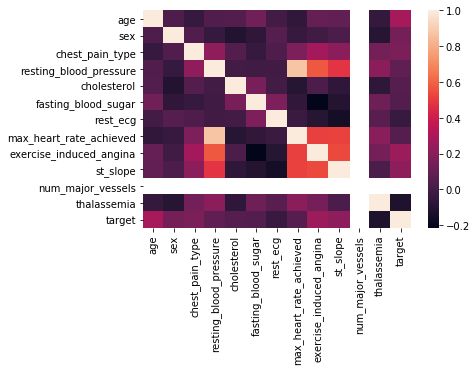

In [88]:
sb.heatmap(data.corr())

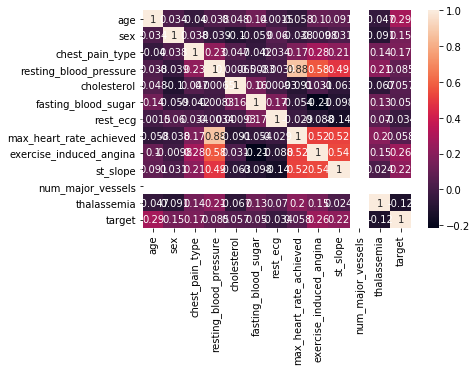

In [91]:
sb.heatmap(data.corr(),annot=True)

# Model Building


Considering complete data_final as x except PerformanceRating

Considering only PerformanceRating as y

In [99]:
x=data.drop(['target'],axis=1)
y=data['target']

In [100]:
#training and testting the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)

In [101]:
# working on RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [102]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
#cross validation
score=cross_val_score(rfr,x,y,cv=5)
print('score mean :',score.mean())
print('score std :',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print(predscore)

MAE : 0.9397499999999999
MSE : 1.3678325
RMSE : 1.1695437144459373

score mean : 0.09400642325719082
score std : 0.1482137129676145

[0.43 1.71 2.48 2.04 1.04 1.86 2.13 2.07 1.06 0.59 1.26 1.18 0.91 1.22
 0.57 2.43 1.18 1.91 1.37 0.92 2.19 1.19 1.78 1.39 1.69 0.72 1.17 1.51
 1.   0.61 2.22 1.86 1.36 1.4  1.57 1.56 1.83 1.27 2.15 1.33 0.99 1.37
 0.89 1.25 1.6  1.62 1.85 2.06 0.53 1.54 0.67 1.48 1.53 1.86 2.81 1.2
 2.13 0.65 0.91 0.49 1.93 1.81 1.75 1.45 2.24 2.2  1.16 1.46 0.89 1.16
 1.44 0.8  2.01 2.14 1.49 1.6  1.57 1.94 1.61 1.52 2.78 1.79 1.87 2.9
 1.5  2.11 1.55 3.2  2.49 2.94 1.   1.48 0.57 1.01 2.68 0.4  0.86 0.43
 2.41 1.18 2.12 1.16 1.88 1.5  2.6  1.89 1.06 0.92 0.8  1.6  0.65 0.57
 2.14 1.19 2.73 0.87 1.58 1.99 1.37 1.35 3.1  1.62 0.79 0.81 2.   2.02
 3.4  1.41 1.38 0.86 1.26 1.95 0.65 2.82 0.7  0.85 0.67 0.98 1.69 2.95
 1.04 1.67 2.62 1.56 0.59 1.94 1.2  1.41 2.27 1.64 1.76 1.55 2.09 1.83
 1.49 1.69 1.85 1.31 2.18 2.14 2.49 2.01 2.74 1.46 1.13 1.48 2.05 2.06
 1.   1.12 0.57 1

In [106]:
#working on DecisionTreeRegressor 

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [107]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
#cross valiation 
score=cross_val_score(dtr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(dtr,x,y,cv=5)
print(predscore)

MAE : 0.9
MSE : 1.75
RMSE : 1.3228756555322954

mean score : -0.7456532811178821
STD score: 0.20177683273532604

[1. 2. 3. 4. 1. 2. 2. 1. 0. 0. 2. 1. 1. 1. 0. 1. 1. 3. 2. 1. 3. 1. 1. 0.
 2. 0. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 3. 0. 1. 0. 1. 1. 0. 1. 1. 3.
 0. 1. 0. 1. 2. 1. 3. 0. 3. 0. 0. 0. 3. 3. 3. 3. 1. 0. 0. 2. 0. 0. 3. 0.
 1. 3. 1. 2. 1. 1. 2. 1. 2. 0. 3. 4. 4. 3. 4. 3. 4. 4. 1. 3. 1. 1. 3. 1.
 0. 0. 4. 1. 0. 2. 3. 1. 4. 0. 1. 2. 0. 3. 0. 0. 3. 3. 3. 1. 2. 4. 1. 0.
 4. 2. 1. 1. 3. 3. 4. 0. 3. 0. 2. 3. 2. 3. 0. 1. 1. 2. 2. 2. 1. 3. 1. 3.
 3. 4. 1. 3. 3. 2. 3. 1. 1. 1. 2. 0. 0. 1. 2. 3. 3. 1. 3. 1. 0. 3. 3. 3.
 1. 1. 1. 3. 3. 0. 1. 0. 3. 3. 0. 4. 3. 0. 1. 1. 3. 3. 2. 0. 3. 1. 3. 1.
 0. 0. 1. 0. 0. 3. 1.]


In [108]:
# working on SVR 

svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)

In [116]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
#cross valiadtion
score=cross_val_score(svr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(svr,x,y,cv=5)
print(predscore)

MAE : 1.1394892774031555
MSE : 1.9738396621893108
RMSE : 1.4049340419355318

mean score : -0.01620446112979728
STD score: 0.07796774738152482

[1.12084771 1.27188985 1.30544285 1.24162585 1.69786139 1.61584814
 1.91092286 1.7105349  1.5507929  1.13079869 1.71846073 1.63788661
 0.96080973 1.72907702 1.33470745 1.67138187 1.05896877 1.70201703
 1.76494656 1.64319408 1.64971278 1.69029672 1.01873559 1.74658934
 1.77048939 0.90121773 1.20877904 1.19294231 0.97834818 0.91574445
 1.35497002 1.67102834 1.56003373 1.58874424 1.77713433 1.43343002
 1.68732586 0.8288733  1.79818426 1.54819471 1.15912143 1.30873689
 1.07281831 1.30839994 1.10446942 1.26292192 1.08779771 1.44158977
 1.15272256 1.13570411 1.11862098 1.1965171  1.13354622 1.09429615
 1.19051716 1.14530791 1.5575799  1.11582881 1.15336021 0.92456588
 1.13925631 1.55767496 1.1420137  1.12142257 1.1757274  1.6313747
 1.11403543 1.12479058 1.00050669 0.9869698  1.24020968 1.20997827
 1.22373681 1.3041334  1.64223833 1.14773844 1.6237078

In [111]:
#working on GridSearchCV 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
gs = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [112]:
gs.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}

In [113]:
gs.best_score_

0.15845396282531896

In [114]:
#saving the model using joblib and pickle
joblib.dump(svr,'hr.pkl')

['hr.pkl']